In [14]:
import sys
print(sys.executable)


c:\Users\Poste\Desktop\SPAM-DETECTION-ML\.venv\Scripts\python.exe


In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [16]:
df = pd.read_csv("../data/spam.csv")
df.head()


,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [17]:
df.columns


Index(['Category', 'Message'], dtype='object')

In [18]:
df.info()
df.isna().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


Category    0
Message     0
dtype: int64

In [19]:
df = df.rename(columns=str.strip)

df["Category"] = df["Category"].astype(str).str.lower().str.strip()
df["Message"] = df["Message"].astype(str)

df.head()


,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [20]:
df["Category"].value_counts()


Category
ham     4825
spam     747
Name: count, dtype: int64

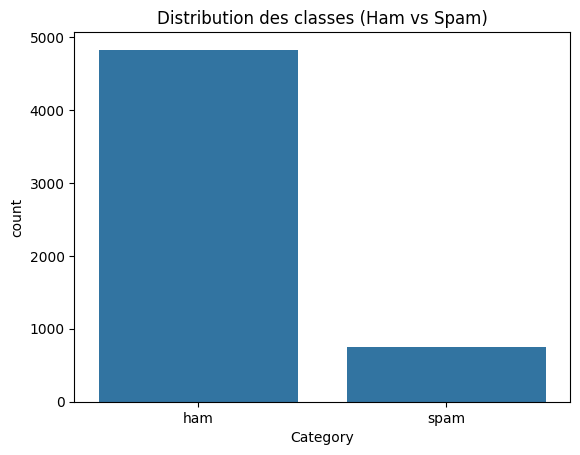

In [21]:
sns.countplot(x="Category", data=df)
plt.title("Distribution des classes (Ham vs Spam)")
plt.show()


In [22]:
#longueur des messages
df["msg_len"] = df["Message"].apply(len)
df[["Category", "msg_len"]].groupby("Category").describe()


msg_len                                                       
           count       mean        std  min    25%    50%    75%    max
Category                                                               
ham       4825.0   71.44829  58.434864  2.0   33.0   52.0   93.0  910.0
spam       747.0  137.98929  29.980287  7.0  132.0  149.0  157.0  223.0

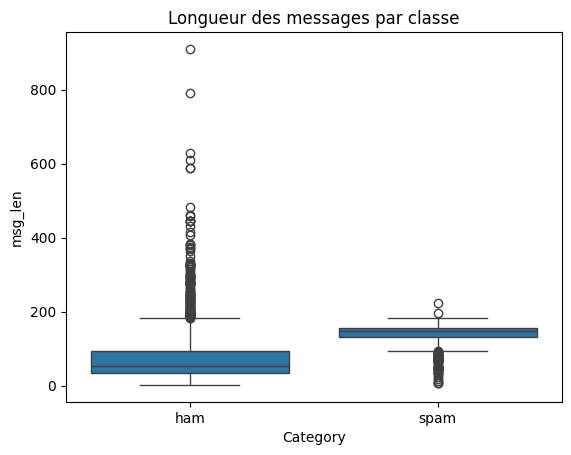

In [23]:
#Boite à moustaches de la longueur des messages par classe/boxplot of message length by class
sns.boxplot(x="Category", y="msg_len", data=df)
plt.title("Longueur des messages par classe")
plt.show()


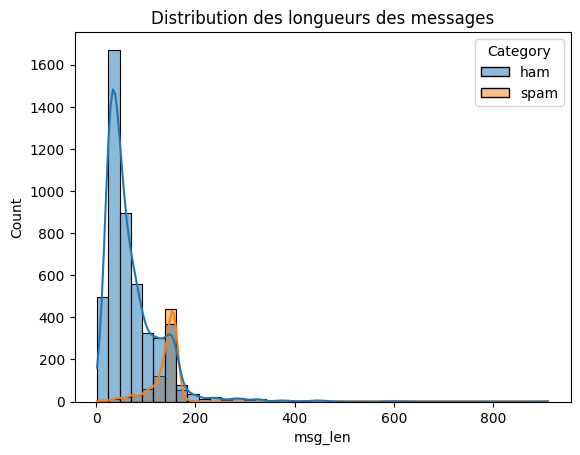

In [24]:
#Distribution des longueurs des messages par classe/distribution of message lengths by class
sns.histplot(data=df, x="msg_len", hue="Category", bins=40, kde=True)
plt.title("Distribution des longueurs des messages")
plt.show()


In [25]:
# Analyse des mots les plus fréquents dans les messages spam et ham
from collections import Counter

spam_words = " ".join(df[df["Category"]=="spam"]["Message"]).lower().split()
ham_words = " ".join(df[df["Category"]=="ham"]["Message"]).lower().split()

Counter(spam_words).most_common(15)


[('to', 682),
 ('a', 375),
 ('call', 339),
 ('your', 263),
 ('you', 252),
 ('for', 202),
 ('the', 201),
 ('or', 188),
 ('free', 180),
 ('2', 169),
 ('is', 151),
 ('ur', 144),
 ('on', 142),
 ('txt', 136),
 ('have', 132)]

<h1>Conclusion</h1>
<p color="red"><strong>L’analyse exploratoire montre que les messages spam ont des caractéristiques textuelles distinctes.
Le déséquilibre entre les classes justifie l’utilisation du F1-score comme métrique principale.</strong></p>
